# SVR model on predicting CO2 emissions in (g/km)

In [11]:
import sys
assert sys.version_info >= (3, 5)
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [12]:
df=pd.read_excel("Dataset/CanadaCarEmissions.xlsx")
df.head()

,MODEL YEAR,MAKE,MODEL(# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,11.6,8.3,10.1,28.0,232.0,NaN,NaN
2,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,11.0,8.3,9.8,29.0,225.0,NaN,NaN
3,1995.0,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,10.8,8.3,9.7,29.0,223.0,NaN,NaN
4,1995.0,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,14.2,10.5,12.5,23.0,288.0,NaN,NaN


In [13]:
#deleting only first row
df.drop(0, inplace=True)

#deleting columns cotaining 'unnamed'
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)], inplace=True, axis=1)
df.head()

,MODEL YEAR,MAKE,MODEL(# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating
1,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,11.6,8.3,10.1,28.0,232.0,NaN,NaN
2,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,11.0,8.3,9.8,29.0,225.0,NaN,NaN
3,1995.0,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,10.8,8.3,9.7,29.0,223.0,NaN,NaN
4,1995.0,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,14.2,10.5,12.5,23.0,288.0,NaN,NaN
5,1995.0,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,A4,Z,14.6,11.0,13.0,22.0,299.0,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26075 entries, 1 to 26075
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MODEL YEAR                     26075 non-null  float64
 1   MAKE                           26075 non-null  object 
 2   MODEL(# = high output engine)  26075 non-null  object 
 3   VEHICLE CLASS                  26075 non-null  object 
 4   ENGINE SIZE (L)                26075 non-null  float64
 5   CYLINDERS                      26075 non-null  float64
 6   TRANSMISSION                   26075 non-null  object 
 7   FUEL TYPE                      26075 non-null  object 
 8   FUEL CONSUMPTION CITY (L/100)  26075 non-null  float64
 9   FUEL CONSUMPTION HWY (L/100)   26075 non-null  float64
 10  COMB (L/100 km)                26075 non-null  float64
 11  COMB (mpg)                     26075 non-null  float64
 12  CO2 EMISSIONS (g/km)           26075 non-null 

In [15]:
df = df.drop(columns=['MAKE', 'MODEL(# = high output engine)', 'VEHICLE CLASS','TRANSMISSION','FUEL TYPE'])

In [16]:
df.head()

,MODEL YEAR,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating
1,1995.0,1.8,4.0,11.6,8.3,10.1,28.0,232.0,NaN,NaN
2,1995.0,1.8,4.0,11.0,8.3,9.8,29.0,225.0,NaN,NaN
3,1995.0,1.8,4.0,10.8,8.3,9.7,29.0,223.0,NaN,NaN
4,1995.0,3.2,6.0,14.2,10.5,12.5,23.0,288.0,NaN,NaN
5,1995.0,3.2,6.0,14.6,11.0,13.0,22.0,299.0,NaN,NaN


In [17]:
df['CO2 Rating'].fillna(df['CO2 Rating'].mean(), inplace = True)
df['Smog Rating'].fillna(df['Smog Rating'].mean(), inplace = True)
df.head()

,MODEL YEAR,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating
1,1995.0,1.8,4.0,11.6,8.3,10.1,28.0,232.0,4.65988,4.674311
2,1995.0,1.8,4.0,11.0,8.3,9.8,29.0,225.0,4.65988,4.674311
3,1995.0,1.8,4.0,10.8,8.3,9.7,29.0,223.0,4.65988,4.674311
4,1995.0,3.2,6.0,14.2,10.5,12.5,23.0,288.0,4.65988,4.674311
5,1995.0,3.2,6.0,14.6,11.0,13.0,22.0,299.0,4.65988,4.674311


In [18]:
# Reorder columns by dropping CO2 EMISSIONS (g/km) and adding it back at the end
df = df[[col for col in df.columns if col != 'CO2 EMISSIONS (g/km)'] + ['CO2 EMISSIONS (g/km)']]

In [19]:
df.describe()

,MODEL YEAR,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 Rating,Smog Rating,CO2 EMISSIONS (g/km)
count,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000
mean,2009.576031,3.355448,5.844257,13.036272,9.162991,11.294082,26.784314,4.659880,4.674311,256.679003
std,7.725814,1.342021,1.796767,3.560212,2.398400,2.997495,7.306594,0.858954,0.863533,63.062087
min,1995.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,1.000000,1.000000,83.000000
25%,2004.000000,2.300000,4.000000,10.600000,7.500000,9.200000,22.000000,4.659880,4.674311,212.500000
50%,2010.000000,3.000000,6.000000,12.600000,8.700000,10.800000,26.000000,4.659880,4.674311,248.000000
75%,2016.000000,4.200000,8.000000,15.100000,10.500000,13.000000,31.000000,4.659880,4.674311,297.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,10.000000,8.000000,608.000000


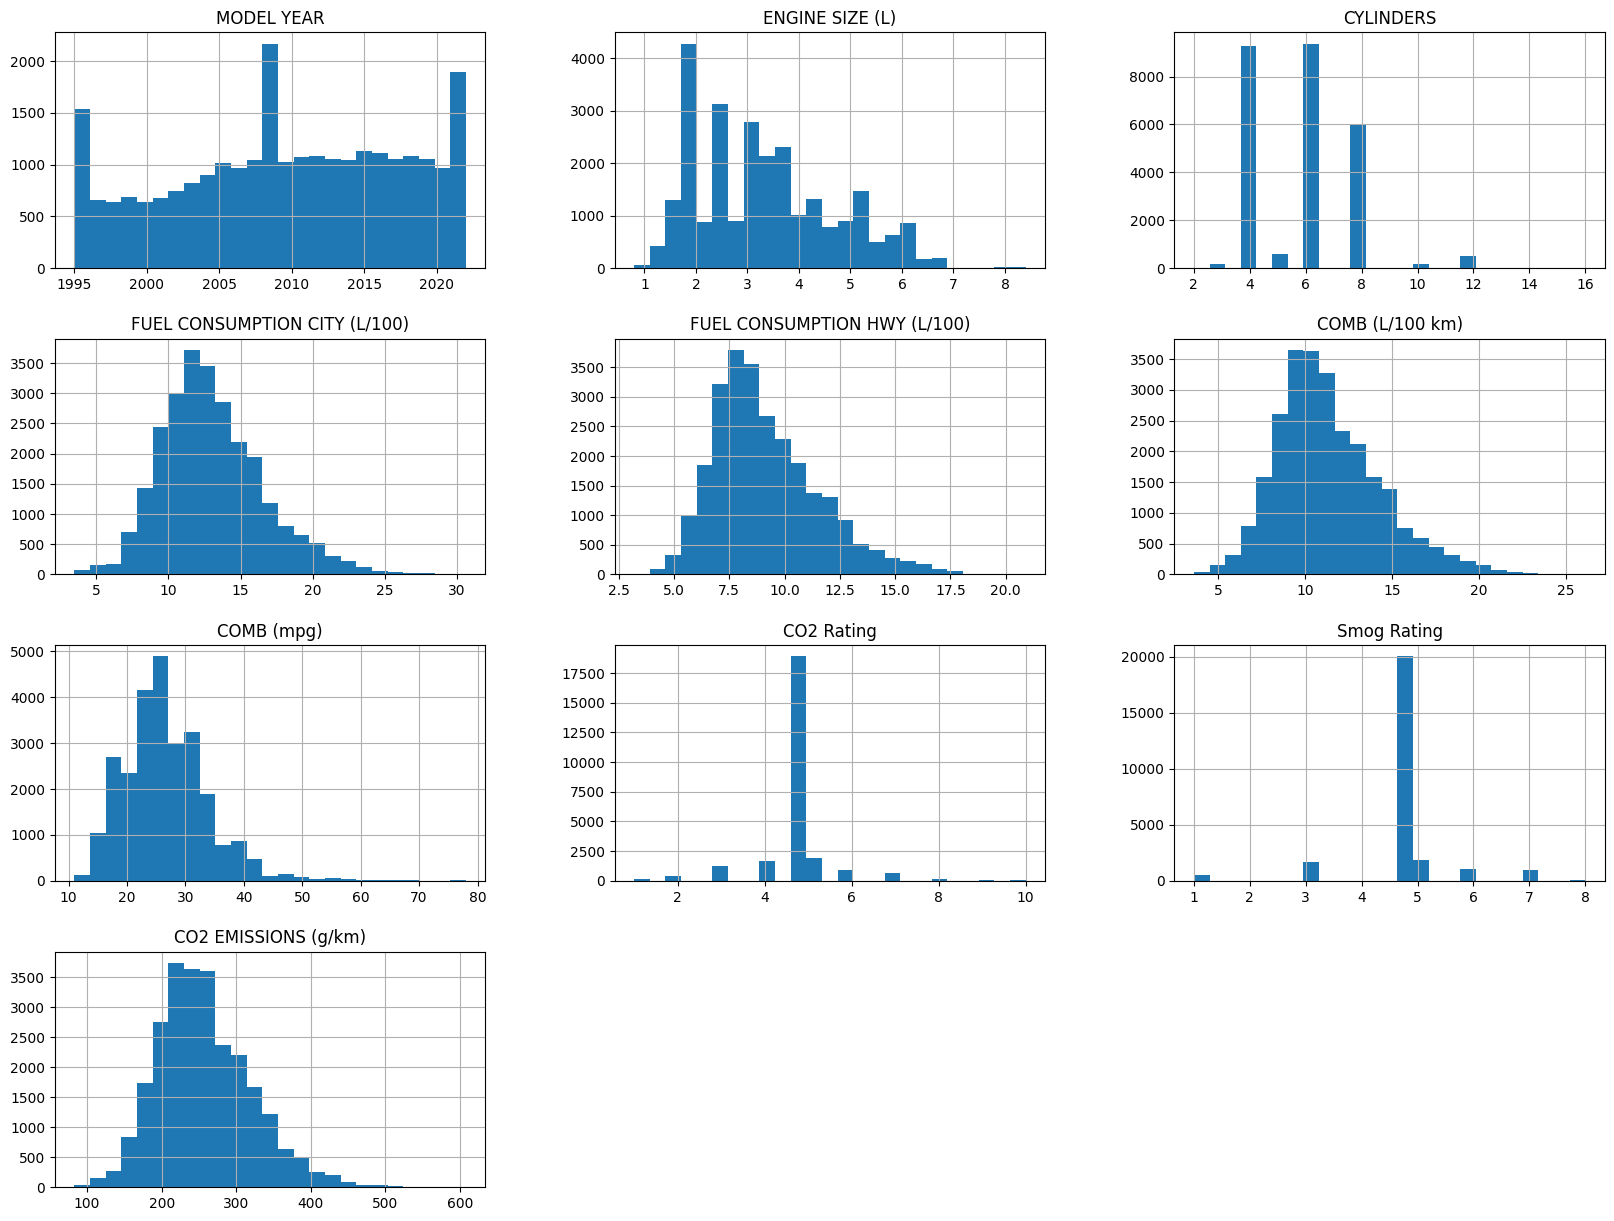

In [20]:
df.hist(bins=25, figsize=(20,15))
plt.show()

<Axes: xlabel='ENGINE SIZE (L)', ylabel='CO2 EMISSIONS (g/km)'>

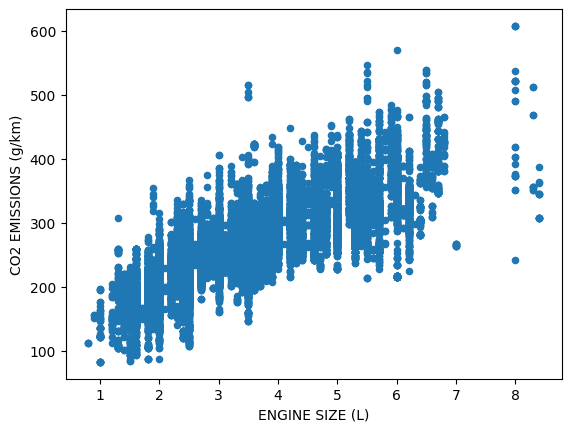

In [21]:
df.plot(kind="scatter", x="ENGINE SIZE (L)", y="CO2 EMISSIONS (g/km)")

<Axes: xlabel='ENGINE SIZE (L)', ylabel='CO2 EMISSIONS (g/km)'>

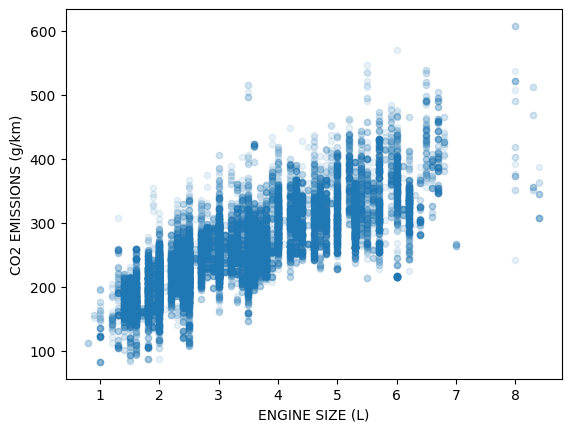

In [22]:
df.plot(kind="scatter", x="ENGINE SIZE (L)", y="CO2 EMISSIONS (g/km)", alpha=0.1)

In [23]:
from pandas.plotting import scatter_matrix

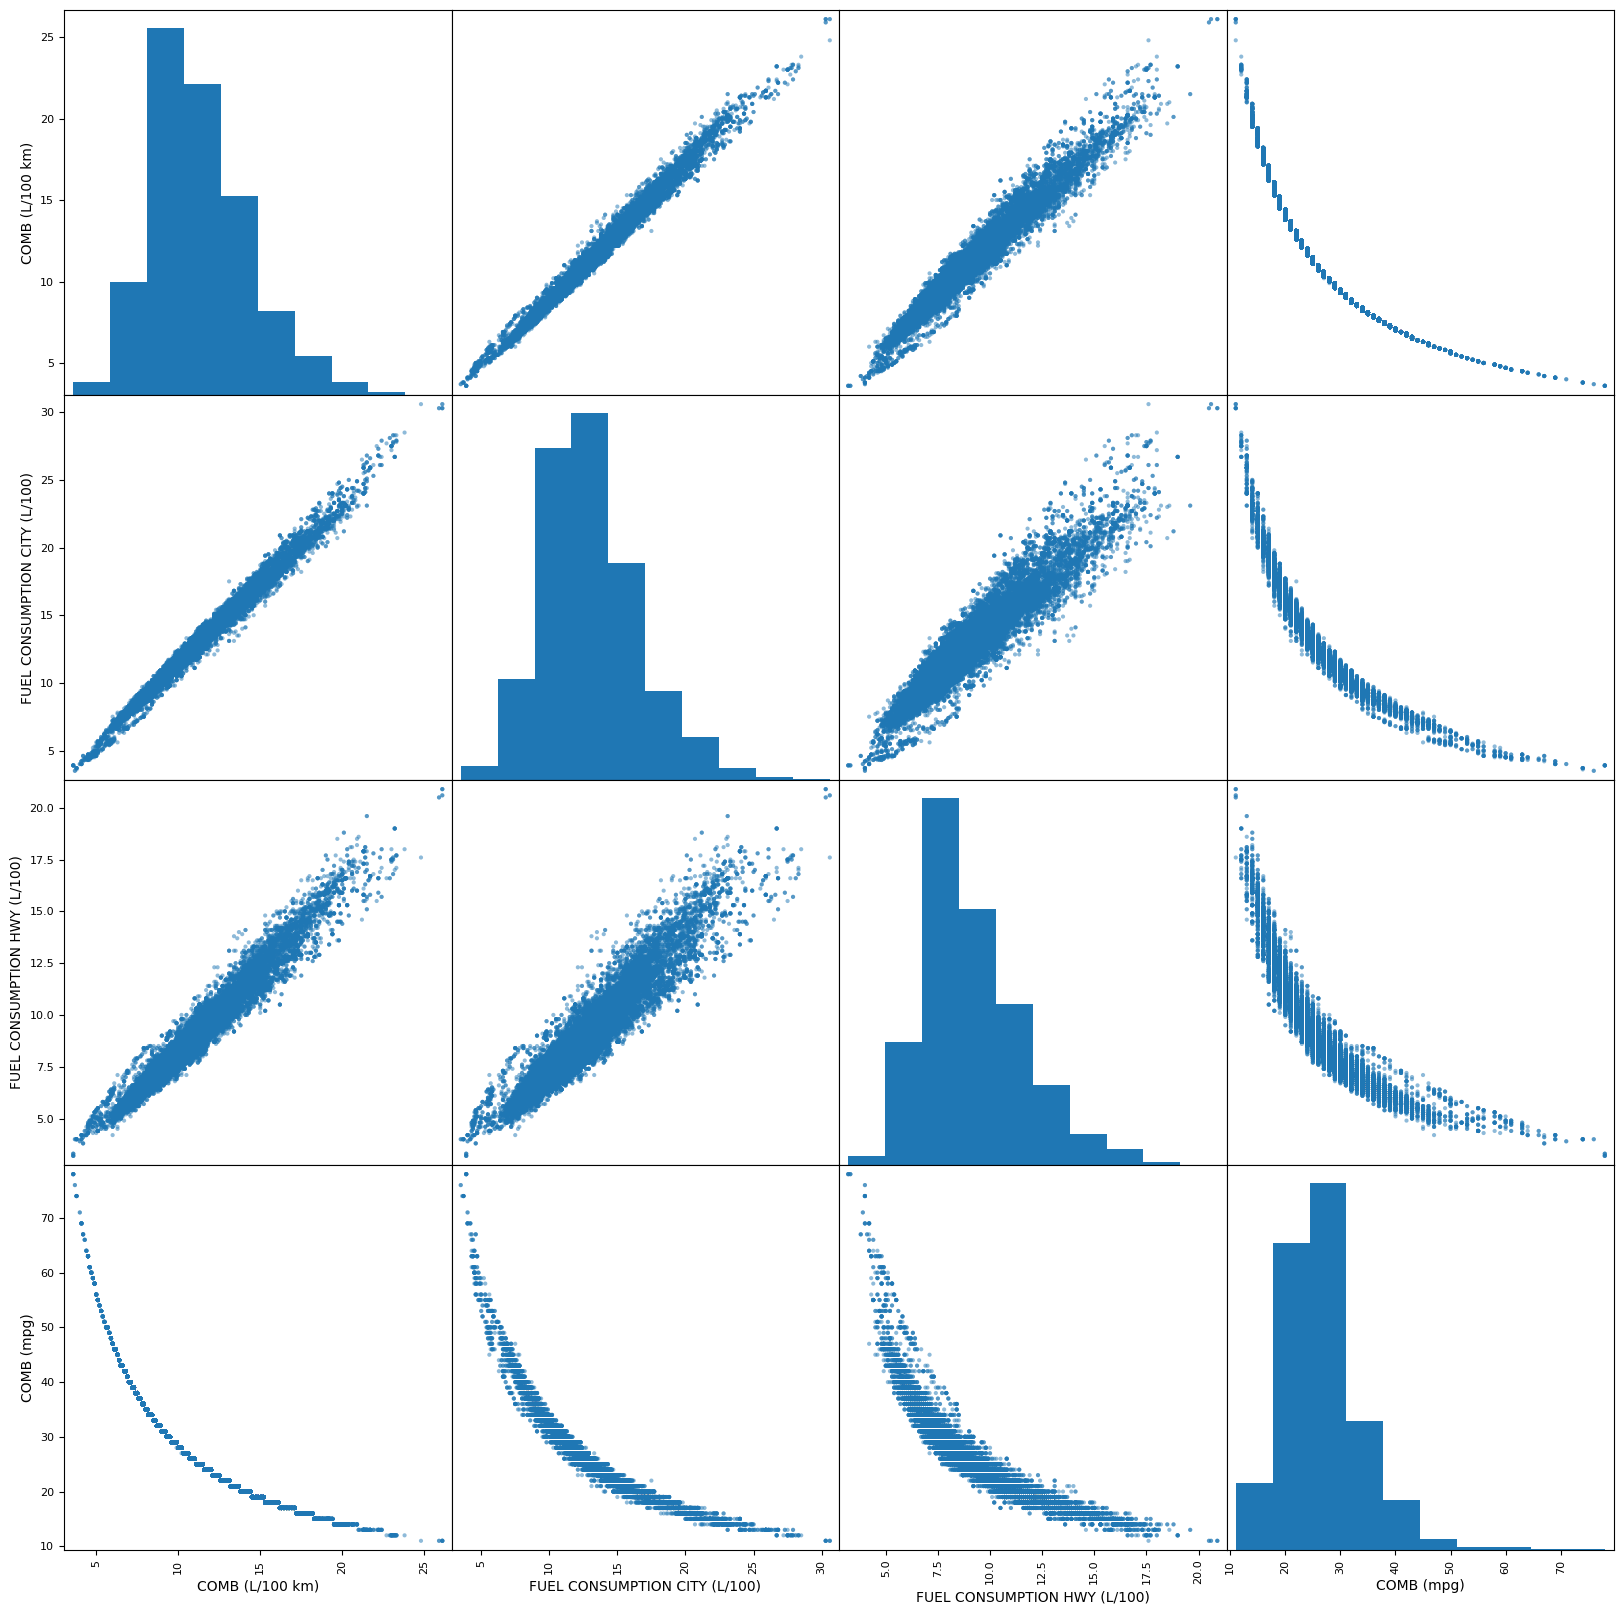

In [24]:
attributes = ["COMB (L/100 km)", "FUEL CONSUMPTION CITY (L/100)", "FUEL CONSUMPTION HWY (L/100)",
              "COMB (mpg)"]
scatter_matrix(df[attributes], figsize=(20, 20))
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26075 entries, 1 to 26075
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MODEL YEAR                     26075 non-null  float64
 1   ENGINE SIZE (L)                26075 non-null  float64
 2   CYLINDERS                      26075 non-null  float64
 3   FUEL CONSUMPTION CITY (L/100)  26075 non-null  float64
 4   FUEL CONSUMPTION HWY (L/100)   26075 non-null  float64
 5   COMB (L/100 km)                26075 non-null  float64
 6   COMB (mpg)                     26075 non-null  float64
 7   CO2 Rating                     26075 non-null  float64
 8   Smog Rating                    26075 non-null  float64
 9   CO2 EMISSIONS (g/km)           26075 non-null  float64
dtypes: float64(10)
memory usage: 2.0 MB


In [26]:
X = df.drop(columns=['CO2 EMISSIONS (g/km)'])
y = df['CO2 EMISSIONS (g/km)']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [29]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20860, 9)
(20860,)
(5215, 9)
(5215,)


In [31]:
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'linear')
regressor_svr.fit(X_train, y_train)

SVR(kernel='linear')

In [32]:
y_pred = regressor_svr.predict(X_test)

In [33]:
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
y_pred_series = pd.Series(y_pred, name='Predicted')
y_pred_series.to_csv('y_pred.csv', index=False)

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8878828118173259

# Taking weights of SVR model

In [35]:
weights = regressor_svr.coef_
intercept = regressor_svr.intercept_
print("Weights:", weights)
print("Intercept:", intercept)

Weights: [[ 0.21291678  0.57739591  2.99379697  1.37904881  6.39777284 12.15533306
  -0.66628573 -1.37374516  0.4659052 ]]
Intercept: [-384.11170479]


In [36]:
# Get the coefficients (as a flat array)
coefficients = regressor_svr.coef_.ravel()

# Get the intercept
intercept = regressor_svr.intercept_[0]

# Match coefficients with feature names
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept (bias term): {intercept:.4f}")

MODEL YEAR: 0.2129
ENGINE SIZE (L): 0.5774
CYLINDERS: 2.9938
FUEL CONSUMPTION CITY (L/100): 1.3790
FUEL CONSUMPTION HWY (L/100): 6.3978
COMB (L/100 km): 12.1553
COMB (mpg): -0.6663
CO2 Rating: -1.3737
Smog Rating: 0.4659

Intercept (bias term): -384.1117


# Custom Input format if needed

In [37]:
# Your custom input values (in the same order as your training features)
input_features = np.array([[2016.0,1.4,4.0,8.7,6.9,7.9,36.0,7.0,4.674311169773965]])  # Always keep 2D shape

# Predict
predicted_value = regressor_svr.predict(input_features)

print("Predicted Output:", predicted_value[0])

Predicted Output: 178.65684325217887


# Time Taken in prediction 

In [42]:
import time

start_time = time.time()  

y_pred_ = regressor_svr.predict(X_test)

end_time = time.time()  

elapsed_time = end_time - start_time  

print(f"Prediction time: {elapsed_time:.4f} seconds")

print(f"Number of test samples: {len(X_test)}")
print(f"Time per sample: {elapsed_time / len(X_test):.6f} seconds")

Prediction time: 2.0051 seconds
Number of test samples: 5215
Time per sample: 0.000384 seconds


In [46]:
import time

# Take the first 1000 samples
X_test_subset = X_test[:1000]

start_time = time.time()

y_pred_ = regressor_svr.predict(X_test_subset)

end_time = time.time()

elapsed_time = end_time - start_time

print(f"Prediction time: {elapsed_time:.4f} seconds")
print(f"Number of test samples: {len(X_test_subset)}")
print(f"Time per sample: {elapsed_time / len(X_test_subset):.6f} seconds")


Prediction time: 0.4134 seconds
Number of test samples: 1000
Time per sample: 0.000413 seconds


# Creating an IEEE 754 format file of y_pred

In [3]:
import csv
import struct

input_file = "y_pred.csv"
output_file = "y_pred_ieee.csv"

def float_to_ieee_754(val):
    try:
        return hex(struct.unpack('<I', struct.pack('<f', float(val)))[0])
    except ValueError:
        return val  # Leave non-float values (e.g., headers) unchanged

with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    
    for i, row in enumerate(reader):
        if i == 0:
            writer.writerow(row)  # Write header as-is
        else:
            ieee_row = [float_to_ieee_754(val) for val in row]
            writer.writerow(ieee_row)

print("✅ Done! IEEE 754 converted values saved to", output_file)


✅ Done! IEEE 754 converted values saved to y_pred_ieee.csv


# Creating an IEEE 754 format file of X_test

In [4]:
input_file = "X_test.csv"
output_file = "X_test_ieee.csv"

def float_to_ieee_754(val):
    try:
        return hex(struct.unpack('<I', struct.pack('<f', float(val)))[0])
    except ValueError:
        return val  # Leave non-float values (e.g., headers) unchanged

with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    
    for i, row in enumerate(reader):
        if i == 0:
            writer.writerow(row)  # Write header as-is
        else:
            ieee_row = [float_to_ieee_754(val) for val in row]
            writer.writerow(ieee_row)

print("✅ Done! IEEE 754 converted values saved to", output_file)

✅ Done! IEEE 754 converted values saved to X_test_ieee.csv


# Creating an IEEE 754 format file of y_test

In [5]:
input_file = "y_test.csv"
output_file = "y_test_ieee.csv"

def float_to_ieee_754(val):
    try:
        return hex(struct.unpack('<I', struct.pack('<f', float(val)))[0])
    except ValueError:
        return val  # Leave non-float values (e.g., headers) unchanged

with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    
    for i, row in enumerate(reader):
        if i == 0:
            writer.writerow(row)  # Write header as-is
        else:
            ieee_row = [float_to_ieee_754(val) for val in row]
            writer.writerow(ieee_row)

print("✅ Done! IEEE 754 converted values saved to", output_file)

✅ Done! IEEE 754 converted values saved to y_test_ieee.csv


# Converting IEEE formatted X_test file from csv to c file.

In [8]:
import csv

input_csv = "X_test_ieee.csv"
output_c = "X_test_input.c"

with open(input_csv, 'r') as infile, open(output_c, 'w') as outfile:
    reader = csv.reader(infile)
    header = next(reader)
    
    # Read all rows into a list
    data_rows = list(reader)
    row_count = len(data_rows)
    col_count = len(header)
    
    outfile.write("// Auto-generated input data from CSV\n")
    outfile.write("// Columns: " + ", ".join(header) + "\n")
    outfile.write("#include <stdint.h>\n\n")
    outfile.write(f"uint32_t input_data[{row_count}][{col_count}] = {{\n")
    
    for row in data_rows:
        formatted_row = ", ".join(row)
        outfile.write(f"    {{{formatted_row}}},\n")
    
    outfile.write("};\n")

print("✅ General-purpose C-style input array saved to", output_c)


✅ General-purpose C-style input array saved to X_test_input.c
